# Introdución

En el sigueinte notebook se va abordar matematicamente y en la practica una red neuronal desde 0 para problemas de clasificación y regresión, exponiendo sus diferencias y semejanzas. Para el problema de clasificación este se basa totalmente en el notebook  de Pepe Cantoral, Ph.D. con modificaciones propias de algunas funciones  y  variables corrigiendo un error en el nombre de la varibles 

 Encarecidamente recimiendo ver sus videos. Por otro lado el cuaderno de regresión es la aplicación de los conocimientos adquiridos con el problema de clasificación.

# Matemática

### Definiendo el problema

El primer aspecto a entender en la entrada y salida que esperamos. Para el problema de clasificación con imagenes la entrada corresponde a cada pixel que la conforma pero no se puede ingresar una matriz a la red por lo tanto se debe transformar la imagen de una matriz a un vector dónde el tamaño va ser el alto y ancho de la imagen que en este caso es: 28X28 = 784 pixeles. Para la salida se espera valores entre el 0 y el 9 por lo que debería haber 10 neuronas (una por cada posibiliad). 

Una vez con las entradas y salidas claras, se debe plantear cuantas capas de neuroas se quieren para la red, además del numero de neuronas que compondra cada capa, para este caso será solo una capa con 200 neuronas. Con todos estos elementos ya se puede ilustrar la red, que sería la siguiente:



<img src="images\red_clasificacion.png">



Para el problema de regresión, se necesita una sola entrada y una sola salida, debido a que se desea emular la función f(x)=sen(x), y en la capa oculta se colocarón 100 neuronas.

<img src="images\red neuronal regresion.drawio.png">

### Función de activación

Con la forma de la red clara, ahora se procederá a tratar las ecuaciones y para ello se simplicará la forma de la red. Como se puede observar en las figuras entran en factor dos piezas claves; Las funciones de activación que están representados por el cuadro en la salida de cada neurona y la función de perdida, represantada por el cuadro a la salida de la función de activación(Para el caso de la función de regresión, no existe una función de activación en la salida de la red por lo que se conceta directamente la neurona a la función de perdida).

 Las funciones de activación permiten restringir la salida de las neuroas para evitar que tome valores no deseados, además permite aprender patrones mas complejos debido a que son funciones No lineales. Esto es importante debido a que si tuvieramos las neuronas, sólo tendriamos una función lineal muy extravagante.


Existen diversas funciones de activación y cada una de ellas son útilies para diversas tareas. Por ejemplo: para este notebook se trató con 3 funciones de activación diferentes, vamos a repasar sus propiedades:



<img src="images\red_clasificacion_simplificado.drawio.png">

<img src="images\red_regresion_simplificado.drawio.png">

La función Softmax se implementa en la última capa de las redes de clasificación debido a que esta nos arroja la distribución de probabilidad es decir que arroja valores entre 0 y 1 con lo que se determina a que clase pertenece los datos. <b>K</b> se refiere al numero de clases y <b>x</b> es el dato de entrada. Para nuestro caso K sería igual a 10.

$$S(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K}x_{j}}$$

La función Relu se suele usar ampliamente en las capas ocultas de las redes neuronales, esta funcion deja pasar todo los valores positivos. Es importante tener en cuenta la derivada de las funciones de activación de las capas escondida debido a que con estas se calculará la propagación hacia atrás.

$$ Relu(x)= {  \begin{array}{lcc}
             0 &   si  & x \leq 0 \\
             \\ x &  si  & x > 0
             \end{array}}
  
   $$

   $$ deRelu(x)= {  \begin{array}{lcc}
             0 &   si  & x \leq 0 \\
             \\ 1 &  si  & x > 0
             \end{array}}
  
   $$

La función sigmoide se suele usar en las capas ocultas y esta permite acotar los valores entre 0 y 1. Para el caso de regresión donde fue usada es especialmente útil ya que no es lineal, lo que permite simular la función Seno solo con una capa.


$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
$$dev\sigma(x) = \sigma(x)(1-\sigma(x))$$

### Propagación hacia adelante

La propagación hacia adelante se refiere a las operaciones matematicas que se deben realiazar para obtener una salida de la red neuronal, es tan fácil como ir recorriendo capa por capa, otro detalle importante es que aquí las variables son matrices por lo que se debe prestar especial atención en las dimensiones de las matrices.

$$z_1 = W_1 X + b_1$$

$$a_1 = ReLU(z_1) $$

$$z_2 = W_2 a_1 + b_2$$

$$a_2 = S(z_2)$$


Para el caso de regresión vemos que la red tendría esta forma, es el mismo concepto pero hay dos cambios importantes, la función de activación se cambió de Relu a sigmoide y la última capa no hay activación, estos cambios son debido a que primero al tener solo una capa y pretender que la red pueda aprender una función como el Seno, es muy dificil lograrlo con Relu, al fin al cabo Relu sigue siendo una función lineal sin la parte negativa, por otro lado en la salida de la red no es necesario tener una función de activación debido a que no se necesita limitar el valor de salida. 

$$z_1 = W_1 X + b_1$$

$$a_1 = \sigma(z_1) $$

$$z_2 = W_2 a_1 + b_2$$



<img src="images\red_explicacion.png">

### Propagación hacia atrás

Antes de explicar la propagación hacia atrás es importante saber ¿cómo la red sabe que está aprendiendo? Esto se responde con la función de costo, está función lo que permite es medir que tan diferente es la salida de la red con los valores esperados, y esta función es diferente dependiendo de la finalidad de la red. Para este cuaderno se utilizó la entropia cruzada para la red de clasificación y el error cuadratico medio para la red de regresión.

Las ecuaciones de la perdidas para clasificación y regresión son las siguientes respectivamente:




$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$






$$ \mathcal{L} = \frac{1}{N}\sum_{j=1}^{K}(y_i - \hat{y}_i)^{2}$$

Ahora, la red no usa esta ecuaciones sino sus derivadas debido a que lo que se desea es minimizar la función de perdida. La derivada de la función es algo larga de desarrollar sin embargo su resultado es bastante simple.

$$ \frac{\partial L}{\partial z_2} = y - \hat{y} $$

La derivada de la funcion de coste se evalua al mismo tiempo que la función de activación de la red, como se observa el resultado es una simple resta.

El objetivo del entrenamiento es que con la función de costo se ajusten los pesos y los offset, por lo tanto el resultado esperable es obtener la derivada de la función de coste con respecto a los pesos y offset. Para obtener esto se seguirá este mismo procedimiento, que consiste ir obteniendo las derivadas parciales siguiendo el camino de la red neuronal simplificada(la regla de la cadena).

<img src="images\dl_dz.png">


por ejemplo una vez obtenido la derivada parcial de la función de coste con respecto a la Z2, quedan los siguientes caminos:

- Obtener la derivada de Z2 con respecto a los pesos W2
- Obtener la derivada de Z2 con respecto a el offset b2
- Obtener la derivada Z2 con respecto a a1

Comenzamos con W2 y b1 debido a que estas nos van a permitir hallar las primeras derivadas parciales que necesitamos ajustar los pesos.


$$ Z_2 =  a_1 W_2 + b_2$$
$$ \frac{\partial z_2}{\partial W_2} = a_1 $$

Es importante notar que la función que se deriva parcialmente es la que tiene relación con estas dos variables, en este caso sería la neruona.

<img src="images\dz_w2.png">



$$ Z_2 =  a_1 W_2 + b_2$$
$$ \frac{\partial z_2}{\partial b_2} = 1 $$

<img src="images\dz_2.png">

Con los primeras derivadas de los pesos y offset hallados ya se puede armar la primera derivadas, para ello se debe hacer uso de la regla de la cadena, que de manera sencilla solo debemos seguir el camino de la derivadas que hemos hecho hasta llegar a la variable que desemanos evaluar.


$$ \frac{\partial L}{\partial W_2} = \frac{\partial z_2}{\partial W_2} \frac{\partial L}{\partial z_2}$$

$$  \frac{\partial L}{\partial W_2} =  a_1 (y - \hat{y}) $$  

$$ \frac{\partial L}{\partial b_2} = \frac{\partial z_2}{\partial b_2} \frac{\partial L}{\partial z_2}$$

$$  \frac{\partial L}{\partial b_2} =  (y - \hat{y}) $$  

Ahora se procederá con el camino faltante:


$$ Z_2 =  a_1 W_2 + b_2$$
$$ \frac{\partial z_2}{\partial a_1} = W_2 $$

<img src="images\dz2_da1.png">

Siguiendo el camino, se debe derivar la función de activación Relu:

$$ a_1 = {  \begin{array}{lcc}
             0 &   si  & z_1 \leq 0 \\
             \\ z_1 &  si  & z_1 > 0
             \end{array}}
  
   $$

   $$ \frac{\partial a_1}{\partial z_1} = {  \begin{array}{lcc}
             0 &   si  & z_1 \leq 0 \\
             \\ 1 &  si  & z_1 > 0
             \end{array}}
  
   $$

<img src="images\da1_dz1.png">

Ahora solo quedan dos caminos que nos interesa W1 y b1, debido a que no hay mas matrices de pesos.


$$ Z_1 =  X W_1 + b_1$$
$$ \frac{\partial z_1}{\partial W_1} = X $$

$$ Z_1 =  X W_1 + b_1$$
$$ \frac{\partial z_1}{\partial b_1} = 1 $$

<img src="images\dz1_dw1.png">

<img src="images\dz1_db1.png">

Para finalizar, usando la regla de la cadena tenemos:

$$ \frac{\partial L}{\partial W_1} = \frac{\partial z_2}{\partial a_1} \frac{\partial L}{\partial z_2} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial W_1}  $$

$$ \frac{\partial L}{\partial b_1} = \frac{\partial z_2}{\partial a_1} \frac{\partial L}{\partial z_2} \frac{\partial a_1}{\partial z_1} \frac{\partial z_1}{\partial b_1}  $$

# Red neuronal desde cero para problemas de clasificación

### Importar librerías

In [1]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
%matplotlib inline

### Importar MNIST 

In [2]:
# Se establece una semilla para que el random de los mismo resultados
np.random.seed(seed=1)

In [3]:
x_train_num = mnist.train_images()
y_train_num = mnist.train_labels()

x_test_num = mnist.test_images()
y_test_num = mnist.test_labels()

In [4]:
x_test_num.shape

(10000, 28, 28)

### Convertir imágenes en vectores, y a float32

In [5]:
x_train = x_train_num[:50000].reshape(50000, -1).astype(np.float32)/255
y_train = y_train_num[:50000].reshape(50000, 1)

x_val = x_train_num[50000:].reshape(10000, -1).astype(np.float)/255
y_val = y_train_num[50000:].reshape(10000, 1)

x_test = x_test_num.copy().reshape(10000, -1).astype(np.float)/255
y_test = y_test_num.copy().reshape(10000, 1)

C:\Users\santiago.duque\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
C:\Users\santiago.duque\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


In [6]:
print(x_train.shape) #shape (50000, 784)
print(y_train.shape) #shape (50000, 1)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)


(50000, 784)
(50000, 1)
(10000, 784)
(10000, 1)
(10000, 784)
(10000, 1)


### Mostrar libreria

In [7]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

La imagen muestreada representa un: [9]


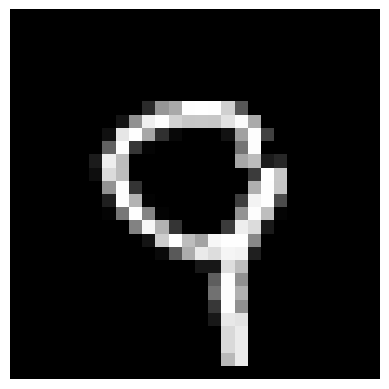

In [8]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx]}')
plot_number(x_test_num[rnd_idx])

### Funciones de la red de clasificación

In [10]:
def shuffle_data(mb_size, x, y, shuffle = True):
    '''
    x  #muestras, 784
    y #muestras, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error en cantidad de muestras'
    total_data = x.shape[0]
    if shuffle: 
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
        
    return x, y

In [11]:
def init_parameters(input_size, neurons):
    
    W1 = np.random.randn(neurons[0], input_size) * 0.001
    b1 = np.zeros((neurons[0], 1))
    
    W2 = np.random.randn(neurons[1], neurons[0]) * 0.001
    b2 = np.zeros((neurons[1], 1))
    
    return {'W1': W1, 'b1':b1, 'W2':W2, 'b2':b2}

In [12]:
def relu(x):
    return np.maximum(0, x)

In [13]:
def softmax(x):
    exp_scores = np.exp(x)
    sum_exp_scores = np.sum(exp_scores, axis=0)
    probs = exp_scores/sum_exp_scores
    return probs

In [14]:
def forward(x, parameters, activation_fcn):
    '''
    x tiene la forma (#pixeles, num samples)
    '''
    z1 = parameters['W1'] @ x + parameters['b1']
    a1 = activation_fcn(z1) # devuel fcn. de activa.
    z2 = parameters['W2'] @ a1 + parameters['b2']
    a2 = softmax(z2)
    
    return z2, z1, a1, a2

In [15]:
def x_entropy(y_hat, y, batch_size=64):
    
    y_hat = y_hat[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    
    return cost

In [16]:
def backward(a2, x, y, z1, a1, z2, parameters, batch_size=64):
    grads = {}
    a2[y.squeeze(), np.arange(batch_size)] -= 1 # y-hat - y
    dl_dz2 = a2.copy()
    
    dl_dW2 = dl_dz2 @ a1.T / batch_size
    dl_db2 = np.sum(dl_dz2, axis =1, keepdims=True) / batch_size
    dl_da1 = parameters['W2'].T @ dl_dz2
    
    dl_dz1 = dl_da1.copy()
    dl_dz1[z1 <= 0 ] =0
    
    dl_dW1 = dl_dz1 @ x 
    dl_db1 = np.sum(dl_dz1, axis=1, keepdims=True) 
    
    assert parameters['W1'].shape == dl_dW1.shape, 'W1 no igual forma'
    assert parameters['W2'].shape == dl_dW2.shape, 'W2 no igual forma'
    assert parameters['b1'].shape == dl_db1.shape, 'b1 no igual forma'
    assert parameters['b2'].shape == dl_db2.shape, 'b2 no igual forma'
    
    grads = {'w1':dl_dW1,  'b1':dl_db1, 'W2':dl_dW2, 'b2':dl_db2}
    
    return grads
    
    

In [17]:
def accuracy(x_data, y_data, parameters, mb_size=64):
    correct = 0
    total = 0
    
    for i in range(0,x_data.shape[0],mb_size):

        x = x_data[i:i+mb_size]
        y = y_data[i:i+mb_size]
    
        _ ,_, _, y_hat = forward(x.T, parameters, relu)
        
        
        correct += np.sum(np.argmax(y_hat, axis=0) == y.squeeze())
        total += y_hat.shape[1]
        
    return correct/total

In [18]:
def train(epochs, x_train, y_train, parameters, mb_size=64, learning_rate = 1e-3):
    for epoch in range(epochs):
        for i in range(0,x_train.shape[0],mb_size):
            x = x_train[i:i+mb_size]
            y = y_train[i:i+mb_size]
            z2, z1, a1, y_hat = forward(x.T, parameters=parameters, activation_fcn=relu)
            cost = x_entropy(y_hat, y, batch_size=len(x))
            grads = backward(y_hat, x, y, z1, a1, z2, parameters, batch_size=len(x))
            
            parameters['W1'] = parameters['W1'] - learning_rate*grads['w1']
            parameters['b1'] = parameters['b1'] - learning_rate*grads['b1']
            parameters['b2'] = parameters['b2'] - learning_rate*grads['b2']
            parameters['W2'] = parameters['W2'] - learning_rate*grads['W2']
            
        print(f'epoch: {epoch}, costo es: {cost}, y accuracy: {accuracy(x_val, y_val, parameters,mb_size)}')
    return parameters
    

### Declaración de parametros y entrenamiento de función

In [19]:
parameters = init_parameters(28*28, [200, 10])
print(parameters['W1'].shape)
print(parameters['W2'].shape)
print(parameters['b2'].shape)

(200, 784)
(10, 200)
(10, 1)


In [20]:
mb_size = 512
learning_rate = 1e-2
epochs = 20
parameters = train(epochs=epochs, x_train=x_train, y_train=y_train, parameters=parameters, mb_size=mb_size, learning_rate=learning_rate)

epoch: 0, costo es: 0.5899405897283392, y accuracy: 0.8607
epoch: 1, costo es: 0.4333531718553162, y accuracy: 0.8992
epoch: 2, costo es: 0.37963420993813946, y accuracy: 0.9131
epoch: 3, costo es: 0.34505849907913994, y accuracy: 0.9225
epoch: 4, costo es: 0.31739801444121385, y accuracy: 0.9293
epoch: 5, costo es: 0.29572468178235534, y accuracy: 0.9346
epoch: 6, costo es: 0.27831340130879667, y accuracy: 0.9407
epoch: 7, costo es: 0.2628579643998762, y accuracy: 0.9454
epoch: 8, costo es: 0.24852370398298382, y accuracy: 0.9494
epoch: 9, costo es: 0.23553890833708474, y accuracy: 0.952
epoch: 10, costo es: 0.22353344370320388, y accuracy: 0.9548
epoch: 11, costo es: 0.2121500198295773, y accuracy: 0.957
epoch: 12, costo es: 0.2023274738501744, y accuracy: 0.9593
epoch: 13, costo es: 0.19279909139199394, y accuracy: 0.9606
epoch: 14, costo es: 0.18379809935487024, y accuracy: 0.962
epoch: 15, costo es: 0.17589848741909828, y accuracy: 0.9628
epoch: 16, costo es: 0.1685374797027314, y

### Evaluación

In [21]:
accuracy(x_train, y_train, parameters, mb_size)

0.97026

In [22]:
accuracy(x_test, y_test, parameters, mb_size)

0.9652

In [23]:
def predict(x, parameters):
    scores2, _, _,_ = forward(x, parameters, relu)
    return np.argmax(scores2)

In [24]:
x_test[0].reshape(-1, 1).shape

(784, 1)

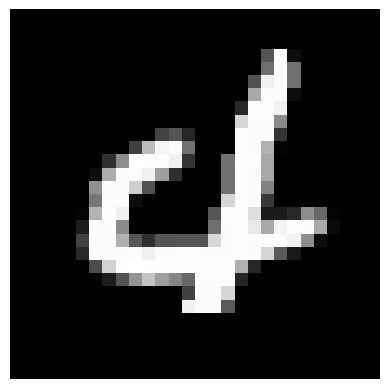

el valor predicho es: 4


In [25]:
idx = np.random.randint(len(y_test))
plot_number(x_test_num[idx])
pred = predict(x_test[idx].reshape(-1, 1), parameters)
print(f'el valor predicho es: {pred}')

# Red neuronal desde cero para problemas de regresión


### Generar datos de entrenamiento

In [26]:
# Generar datos de entrenamiento

x_train = np.arange(0, 2*np.pi, 0.1)
y_train = np.sin(x_train)

In [27]:
parameters = init_parameters(1, [16, 1])
print(parameters['W1'].shape)
print(parameters['W2'].shape)
print(parameters['b2'].shape)

(16, 1)
(1, 16)
(1, 1)


### Funciones de la red de regresión

In [28]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


In [29]:
def sigmoid(x):
  
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

def sigmoid_derivada(x):

    return sigmoid(x)*(1-sigmoid(x))

In [30]:
input_size = 1
hidden_size = 64
output_size = 1
learning_rate = 0.001
epochs = 10000
mb_size = 1

In [31]:
w_hidden = np.random.randn(hidden_size, input_size)
w_out = np.random.randn(output_size, hidden_size)


In [32]:
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

In [33]:
def fordward(x, w_hidden, w_out):

    z_hidden = np.dot(w_hidden, x)
    y_hidden = sigmoid(z_hidden)
    z_out = np.dot(w_out, y_hidden)
    

    return z_hidden, y_hidden, z_out

In [34]:
def backward(x, y_true, w_hidden, w_out):
    # Forward pass
    
    z_hidden, y_hidden, z_out = fordward(x, w_hidden, w_out)

    y_pred = z_out

    # Backward pass
    dL_dy_pred = 2 * (y_pred - y_true) / y_pred.size

    dL_dz_out = dL_dy_pred
    dL_dw_out = np.dot(dL_dz_out, y_hidden.T)

    dL_dy_hidden = np.dot(w_out.T, dL_dz_out)
    
    dL_dz_hidden = dL_dy_hidden * sigmoid_derivada(z_hidden)
    dL_dw_hidden = np.dot(dL_dz_hidden, x.T)

    return dL_dw_out, dL_dw_hidden

### Generación de datos de entrenamiento

In [35]:
# Generate the training data
n_samples = 6000
x_train = np.random.uniform(-np.pi, np.pi, (input_size, n_samples))
y_train = np.sin(x_train)

### Declaración de parametros y entrenamiento de función

In [36]:
# Train the network
for i in range(epochs):

    z_hidden, y_hidden, y_pred = fordward(x_train, w_hidden, w_out)

    dL_dw_out, dL_dw_hidden = backward(x_train, y_train, w_hidden, w_out)

    w_hidden -= learning_rate * dL_dw_hidden
    w_out -= learning_rate * dL_dw_out

    #for j in range(0,x_train.shape[0],mb_size):
       
    #    x = x_train[j:j+mb_size]
    #    y = y_train[j:j+mb_size]

      
        
        # Update the weights
        
        
    
        
        # Compute the loss
    loss = mse_loss(y_pred, y_train)
    if i % 1000  == 0:
        print(f"Epoch {i}, loss: {loss:.4f}")



Epoch 0, loss: 9.4360
Epoch 1000, loss: 0.0292
Epoch 2000, loss: 0.0172
Epoch 3000, loss: 0.0110
Epoch 4000, loss: 0.0078
Epoch 5000, loss: 0.0062
Epoch 6000, loss: 0.0053
Epoch 7000, loss: 0.0047
Epoch 8000, loss: 0.0044
Epoch 9000, loss: 0.0042


In [37]:
_,_,y_pred = fordward(x_train.reshape(input_size, -1), w_hidden, w_out)
print(y_pred)

[[ 0.70110846  0.95805911  0.91047689 ... -0.80741953  0.50224032
   0.3014685 ]]


In [38]:
print(y_train)

[[ 0.77828728  0.99926841  0.9834522  ... -0.89564398  0.51194967
   0.20548014]]


In [39]:
loss = mse_loss(y_pred, y_train)
print(loss)

0.0040557942395138555


### Evaluación

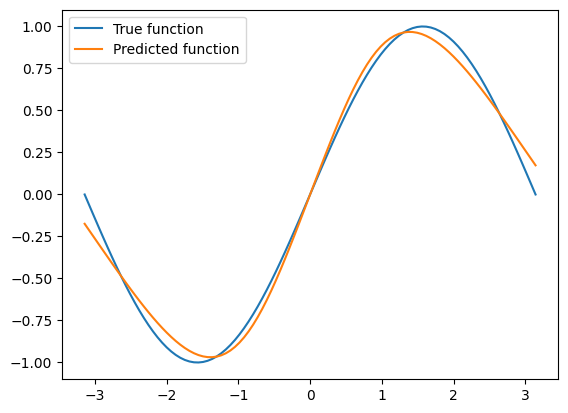

In [40]:
# Test the network
x_test = np.linspace(-np.pi, np.pi, 100)
y_test = np.sin(x_test)

_,_,y_pred = fordward(x_test.reshape(input_size, -1), w_hidden, w_out)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(x_test, y_test, label="True function")
plt.plot(x_test, y_pred.flatten(), label="Predicted function")
plt.legend()
plt.show()

In [41]:
print(mse_loss(y_pred, y_test))

0.0042746551760421934
